#Import Relevent Python Libraries etc

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize
from scipy.optimize import curve_fit
from scipy.optimize import leastsq


##Create Data to Plot

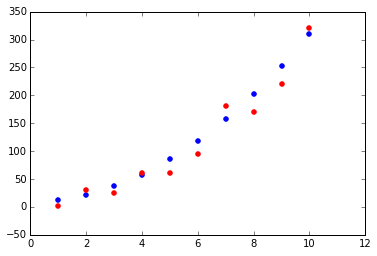

In [20]:
x = np.linspace(1,10,10)
y_exact = 3*x**2+10
y = [2,30,25,60,60,95,180,170,220,320]

plt.scatter(x,y_exact,color='blue')
plt.scatter(x,y,color='red')

##curve_fit

[ 2.95038295  2.61025641]
[ 32.19393939 -60.86666667]


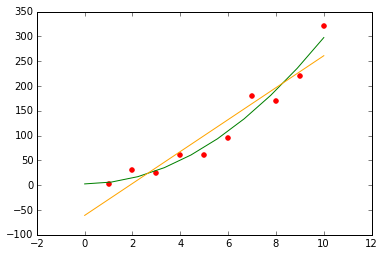

In [21]:
from scipy.optimize import curve_fit

def fit1(x, a, b):
    y1 = a*(x**2)+b
    return y1

def fit2(x, m, c):
    y2 = m*x + c
    return y2

p0 = [1,1] # intial estimates of fit parameters

coeffs1, matcov1 = curve_fit(fit1, x, y, p0)      # fit curve against x and y data sets
coeffs2, matcov2 = curve_fit(fit2, x, y, p0)

xfit1 = np.linspace(0.0, 10.0, 10.0)         # give finer resultion array for plot
yfit1 = fit1(xfit1, *coeffs1)

xfit2 = np.linspace(0.0, 10.0, 10.0)         # give finer resultion array for plot
yfit2 = fit2(xfit2, *coeffs2)  

plt.scatter(x, y, color='red',)
plt.plot(xfit1,yfit1,color='green')
plt.plot(xfit2,yfit2,color='orange')
print(coeffs1)
print(coeffs2)


##try lmfit??
Is a seperate python module which has many built in fitting functions including logistic etc and looks simple to apply bounds to parameters

##least squares fit with no bounds = working

Estimates from leastsq 
 [  4.4552453   -5.25373922  20.8903552 ] 1
number of function calls = 9


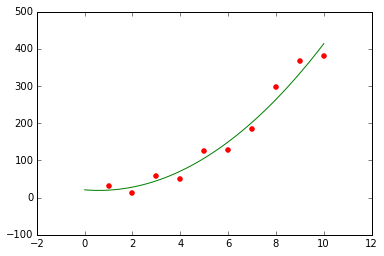

In [22]:
import numpy
from scipy import optimize

x = np.linspace(1.0,10,10)
y_exact = 3*x**2 + 4*x +5
#y_data = np.array([2.0,30,25,60,60,95,180,170,220,320])
y_data = y_exact + 30*np.random.randn(len(x)) 

def fitfunc(p, x):
    ## The Equation to fit##
    func = p[0]*(x**2) + p[1]*x + p[2]
    return func

def errfunc(p, x, y):
    return fitfunc(p,x) -y

guess = np.array([1.0,1.0,1.0])
params, C, info, msg, success = optimize.leastsq(errfunc, guess, args=(x, y_data), full_output=1)
print('Estimates from leastsq \n', params,success)
print('number of function calls =', info['nfev'])

xfit1 = np.linspace(0.0, 10.0, 100.0)         # to calc fitted plot
yfit1 = params[0]*(xfit1**2) + params[1]*xfit1 + params[2]

plt.scatter(x, y_data, color='red',)
plt.plot(xfit1,yfit1,color='green')

##Try and add bounds to parameters - IT WORKS!
### Use fmin_slsqp ? or .minize(method=SLSQP) etc

[ 2.9999997   4.00000328  4.99999354]
[ 2.49999999  3.00000004  5.00000006]


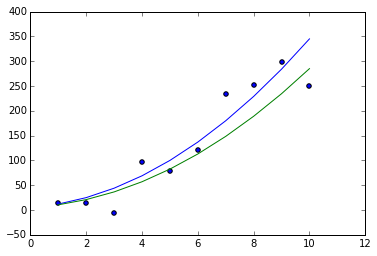

In [52]:
## Simple minimise example
# so far havent made it work with any other function...

x = np.linspace(1.0,10,10)
y_exact = 3*x**2 + 4*x +5
#y_data = np.array([2.0,30,25,60,60,95,180,170,220,320])
y_data = y_exact + 30*np.random.randn(len(x))

def fitfunc(p, x):
    ## The Equation to fit##
    func = p[0]*(x**2) + p[1]*x + p[2]
    return func

def errfunc(p, x, y):
    return fitfunc(p,x) -y

guess = np.array([1.0,1.0,1.0])

#fun = lambda p: (p[0] - 1)**2 + (p[1] - 2.5)**2
fun = lambda p: sum((y_exact-(p[0]*(x**2) + p[1]*x+p[2]))**2)
res1 = optimize.minimize(fun, guess, method='SLSQP', tol=1e-10)
print(res1.x)
#print(res1.x[1])

yfit1 = res1.x[0]*x**2 + res1.x[1]*x + res1.x[2]

bnds = ((-1, 2.5), (0, 3.0), (0,5))
res2 = optimize.minimize(fun, guess, method='SLSQP', tol=1e-10, bounds=bnds)
print(res2.x)

yfit2 = res2.x[0]*x**2 + res2.x[1]*x + res2.x[2]

plt.scatter(x,y_data)
plt.plot(x,yfit1)
plt.plot(x,yfit2)

##lmfit - Try not to use if possible and stick to native SciPy functionality

[[Model]]
    Model(quad)
[[Fit Statistics]]
    # function evals   = 8
    # data points      = 10
    # variables        = 3
    chi-square         = 3226.974
    reduced chi-square = 460.996
[[Variables]]
    a:   3.39772727 +/- 0.934397 (27.50%) (init= 1)
    b:  -5.18106060 +/- 10.54669 (203.56%) (init= 2)
    c:   13.8833335 +/- 25.25295 (181.89%) (init= 60)
[[Correlations]] (unreported correlations are <  0.100)
    C(a, b)                      = -0.975 
    C(b, c)                      = -0.909 
    C(a, c)                      =  0.814 


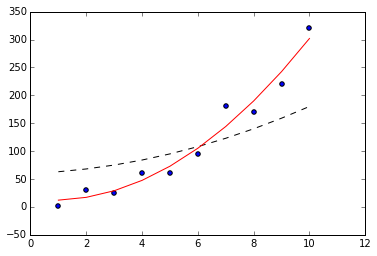

In [14]:
from lmfit import minimize, Parameters, Model
from numpy import sqrt, pi, exp, linspace

#def gaussian(x, amp, cen, wid):
#    "Example gaussian function"
#    return amp* exp(-(x-cen)**2/wid)

def quad(x, a, b, c):
    "Example quadratic function"
    return a*(x**2) + b*x + c

#gmod = Model(gaussian)  # automatically expract variables which can be named below.
qmod = Model(quad)

params = Parameters()
params.add('a', value = 2, vary=False)
params.add('b', value = 2)
params.add('c', value = 2)

#result = gmod.fit(y, x=x, amp=5, cen=5, wid=1)
#print(result.fit_report())

result1 = qmod.fit(y, x=x, a=1, b=2, c=60)
#result1 = qmod.fit(y, x=x, params)
print(result1.fit_report())

plt.scatter(x, y)
plt.plot(x, result1.init_fit, 'k--')
plt.plot(x, result1.best_fit, 'r-')
